# Getting information from programming languages from Wikidata

## Introduction

Wikidata is a multilingual, structured and open knowledge base. It consists of information related to persons, events, scientific articles, places etc. These information can be easily extracted and analysed by using a query service called SPARQL endpoint. This notebook shows how to get information related to programming languages and how to analyse and visualize this information.

## SPARQL
Wikidata can export its knowledge base in the form of triples, i.e., in the form of Subject property value. Take for example to say C, [C](https://www.wikidata.org/wiki/Q15777)  is a programming language, following statements are used

Q15777 P31 Q9143.

where Q15777 corresponds to identifier of C on wikidata, Q9143 corresponds to the identifier of the concept programming language and P31 corresponds to the identifier of the relationship 'is a' or 'instance of'. However, if we include the namespace, the above triple becomes

wd:Q15777 wdt:P31 wd:Q9143

where wd corresponds to the wikidata entity namespace and wdt corresponds to the wikidata type.

Wikidata provides a SPARQL endpoint to extract a subset of these triples. Take for example, if we are interested to get all the programming languages in the Wikidata, we may use a variable in place of wd:Q15777 in the following way.

?item wdt:P31 wd:Q9143.

Wikidata SPARQL query engine will match the variable 'item' with the triple entries present in the knowledge base and give the result.

The following program will give you 10 programming languages. 


In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?item WHERE {
  ?item wdt:P31 wd:Q9143;
}
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result)

{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q59'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q2366'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q2378'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q2407'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5288'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q5301'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q13743'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q15777'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q16340'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q20479'}}


However, we may be interested in the English labels of these programming languages. So we make use of another property called 'rdf:label' where rdf is the namespace and label is the property. However, we want to limit labels to those in English language.

?item rdfs:label ?label. 
FILTER(lang(?label) = "en")

where FILTER helps us to filter the labels out and lang() gives us the language code of the label. In our case "en" is the language code of English on Wikidata.

In [6]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?label WHERE {
  ?item wdt:P31 wd:Q9143.
  ?item rdfs:label ?label. 
  FILTER(lang(?label) = "en")
}
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["label"]["value"])

PHP
IBM PL/S
PL/pgSQL
POW!
Perl 6
SQL:2008
P′′
URBI
Unified Parallel C
Dylan


Continuing with our example, we may also be interested in other property values of the programming languages, like the year on which it was released. So we add 

?item wdt:P571 ?date.

to our query and we make use of YEAR() to get the year from the date.


In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?item ?label (YEAR(?date) as ?year) WHERE {
  ?item wdt:P31 wd:Q9143.
  ?item rdfs:label ?label.
  ?item wdt:P571 ?date.
  FILTER(lang(?label) = "en").
}
ORDER by ?year
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print(result["label"]["value"],": ", result["year"]["value"])

ENIAC coding system :  1943
ENIAC Short Code :  1946
Von Neumann and Goldstine graphing system :  1946
ARC Assembly :  1947
Plankalkül :  1948
CPC Coding scheme :  1948
Curry notation system :  1948
Short Code :  1949
assembly language :  1949
Short Code :  1950


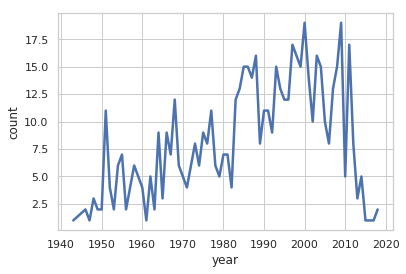

In [11]:
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON
import seaborn as sns


sparql = SPARQLWrapper("http://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?year (COUNT(?item) as ?count) WHERE {
  ?item wdt:P31 wd:Q9143.
  ?item wdt:P571 ?date.
  BIND(YEAR(?date) as ?year)
}
GROUP by ?year
ORDER by ?year
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

array = []
for result in results["results"]["bindings"]:
    array.append((result["year"]["value"], result["count"]["value"], ))
    
dataframe = pd.DataFrame(array, columns=['year', 'count'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "count":"i"})

sns.set(style="whitegrid")
sns.lineplot(data=dataframe, palette="tab10", linewidth=2.5, x="year", y="count")

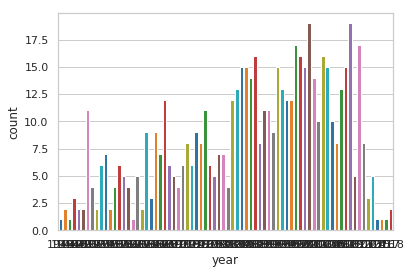

In [21]:
import pandas as pd
from SPARQLWrapper import SPARQLWrapper, JSON
import seaborn as sns


sparql = SPARQLWrapper("http://query.wikidata.org/sparql")
sparql.setQuery("""
SELECT ?year (COUNT(?item) as ?count) WHERE {
  ?item wdt:P31 wd:Q9143.
  ?item wdt:P571 ?date.
  BIND(YEAR(?date) as ?year)
}
GROUP by ?year
ORDER by ?year
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

array = []
for result in results["results"]["bindings"]:
    array.append((result["year"]["value"], result["count"]["value"], ))
    
dataframe = pd.DataFrame(array, columns=['year', 'count'])
dataframe = dataframe.astype(dtype= {"year":"<i4", "count":"i"})

sns.set(style="whitegrid")
sns.barplot(data=dataframe, palette="tab10", x="year", y="count")